Licence CC BY-NC-ND, Valérie Roy & Thierry Parmentelat

In [ ]:
from IPython.display import HTML
HTML(url="https://raw.githubusercontent.com/ue12-p22/python-numerique/main/notebooks/_static/style.html")



# suite du TP simple avec des images

merci à Wikipedia et à stackoverflow

**le but de ce TP n'est pas d'apprendre le traitement d'image  
on se sert d'images pour égayer des exercices avec `numpy`  
(et parce que quand on se trompe ça se voit)**

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from random import *

**notions intervenant dans ce TP**

sur les tableaux `numpy.ndarray`

* `reshape()`, tests, masques booléens, *ufunc*, agrégation, opérations linéaires sur les `numpy.ndarray`
* les autres notions utilisées sont rappelées (très succinctement)

pour la lecture, l'écriture et l'affichage d'images

* utilisez `plt.imread`, `plt.imshow`
* utilisez `plt.show()` entre deux `plt.imshow()` dans la même cellule

**note**

* nous utilisons les fonctions de base sur les images de `pyplot` par souci de simplicité
* nous ne signifions pas là du tout que ce sont les meilleures  
par exemple `matplotlib.pyplot.imsave` ne vous permet pas de donner la qualité de la compression  
alors que la fonction `save` de `PIL` le permet

* vous êtes libres d'utiliser une autre librairie comme `opencv`  
  si vous la connaissez assez pour vous débrouiller (et l'installer), les images ne sont qu'un prétexte

**n'oubliez pas d'utiliser le help en cas de problème.**

## Création d'un patchwork

1. Le fichier `rgb-codes.txt` contient une table de couleurs:
```
AliceBlue 240 248 255
AntiqueWhite 250 235 215
Aqua 0 255 255
.../...
YellowGreen 154 205 50
```
Le nom de la couleur est suivi des 3 valeurs de ses codes `R`, `G` et `B`  
Lisez cette table en `Python` et rangez-la dans la structure qui vous semble adéquate.
<br>

1. Affichez, à partir de votre structure, les valeurs rgb entières des couleurs suivantes  
`'Red'`, `'Lime'`, `'Blue'`
<br>

1. Faites une fonction `patchwork` qui  

   * prend une liste de couleurs et la structure donnant le code des couleurs RGB
   * et retourne un tableau `numpy` avec un patchwork de ces couleurs  
   * (pas trop petits les patchs - on doit voir clairement les taches de couleurs  
   si besoin de compléter l'image mettez du blanc  
   (`numpy.indices` peut être utilisé)
<br>
<br>   
1. Tirez aléatoirement une liste de couleurs et appliquez votre fonction à ces couleurs.
<br>

1. Sélectionnez toutes les couleurs à base de blanc et affichez leur patchwork  
même chose pour des jaunes  
<br>

1. Appliquez la fonction à toutes les couleurs du fichier  
et sauver ce patchwork dans le fichier `patchwork.jpg` avec `plt.imsave`
<br>

1. Relisez et affichez votre fichier  
   attention si votre image vous semble floue c'est juste que l'affichage grossit vos pixels
   
vous devriez obtenir quelque chose comme ceci
<img src="patchwork-all.jpg" width="200px">

In [8]:
#1
dico = {}

fichier = open("rgb-codes.txt", "r")
lignes = fichier.readlines()
#print(lignes)
for i in lignes :
    mots = i.split()
    dico[mots[0]] = [int(mots[1]), int(mots[2]), int(mots[3])]

fichier.close()

#2
print(dico['Red'], dico['Lime'], dico['Blue'])



[255, 0, 0] [0, 255, 0] [0, 0, 255]


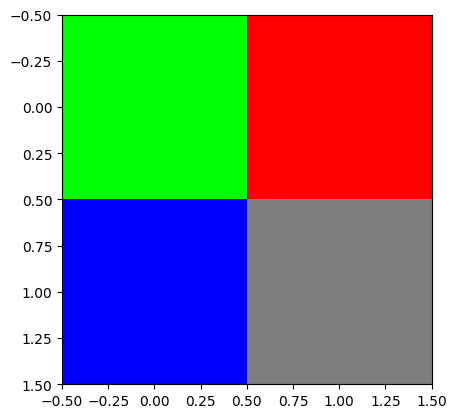

In [52]:
#3
!!!!!
#print(np.indices((2,3), dtype=np.uint8))
# pas compris np.indices()
def est_un_carre(x):
    a = False
    if sqrt(x) == int(sqrt(x)) :
        a = True
    return a

def patchwork(liste, dic) :
    L=[]
    for i in liste :
        L.append(dic[i])
    while not est_un_carre(len(L)) :
        L.append([125, 125, 125])
    Tab = np.array(L, dtype=np.uint8)
    Tab = np.resize(Tab, (int(sqrt(len(L))), int(sqrt(len(L))), 3))
    return Tab

T = patchwork(['Lime', 'Red', 'Blue'], dico)
plt.imshow(T)
plt.show()

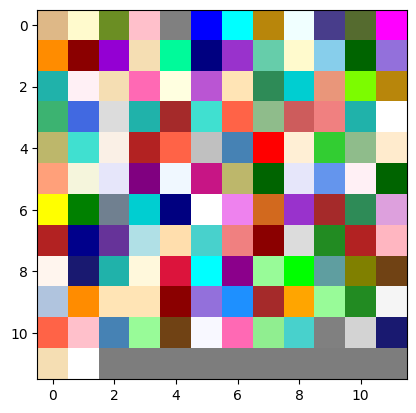

In [53]:
#4
n = randint(1, len(dico))
L_al = np.random.choice(list(dico), n)

T = patchwork(L_al, dico)
plt.imshow(T)
plt.show()

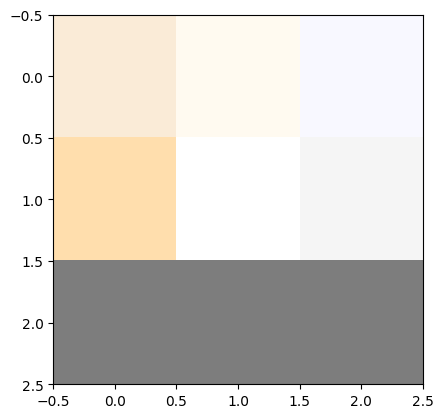

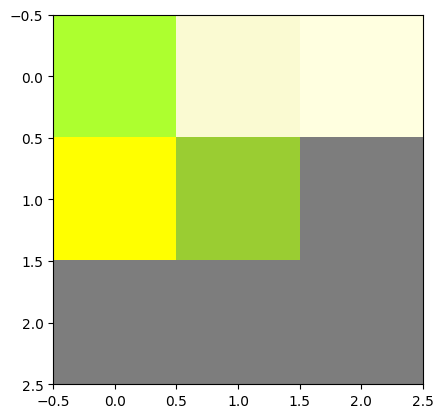

In [54]:
#5
Blanc = []
for couleur in dico :
    if 'White' in couleur :
        Blanc.append(couleur)
plt.imshow(patchwork(Blanc, dico))
plt.show()

Jaune = []
for couleur in dico :
    if 'Yellow' in couleur :
        Jaune.append(couleur)
plt.imshow(patchwork(Jaune, dico))
plt.show()

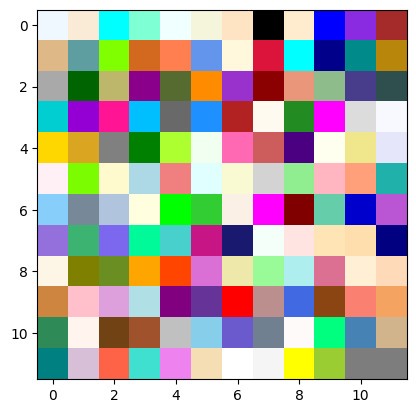

In [55]:
#6
Tout = patchwork(list(dico), dico)

plt.imshow(Tout)
plt.show()

plt.imsave("patchwork.png", Tout)

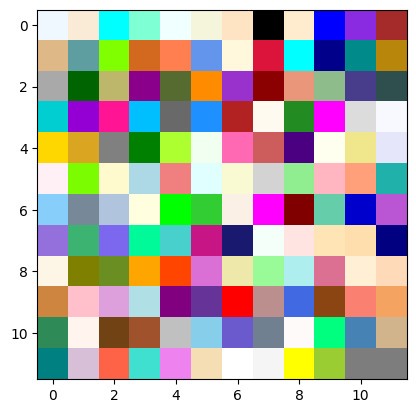

In [56]:
#7

im = plt.imread("patchwork.png")
plt.imshow(im)
plt.show()

## Somme des valeurs RGB d'une image

0. Lisez l'image `les-mines.jpg`

1. Créez un nouveau tableau `numpy.ndarray` en sommant **avec l'opérateur `+`** les valeurs RGB des pixels de votre image  

2. Affichez l'image (pas terrible), son maximum et son type

3. Créez un nouveau tableau `numpy.ndarray` en sommant **avec la fonction d'agrégation `np.sum`** les valeurs RGB des pixels de votre image

4. Affichez l'image, son maximum et son type

5. Pourquoi cette différence ? Utilisez le help `np.sum?`

6. Passez l'image en niveaux de gris de type entiers non-signés 8 bits  
(de la manière que vous préférez)

7. Remplacez dans l'image en niveaux de gris,   
les valeurs >= à 127 par 255 et celles inférieures par 0  
Affichez l'image avec une carte des couleurs des niveaux de gris  
vous pouvez utilisez la fonction `numpy.where`

8. avec la fonction `numpy.unique`  
regardez les valeurs différentes que vous avez dans votre image en noir et blanc

In [68]:
np.unique?

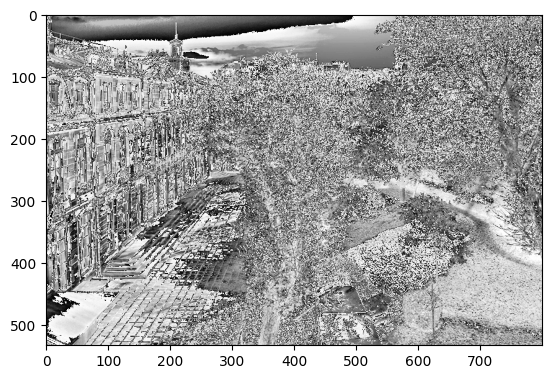

255
uint8


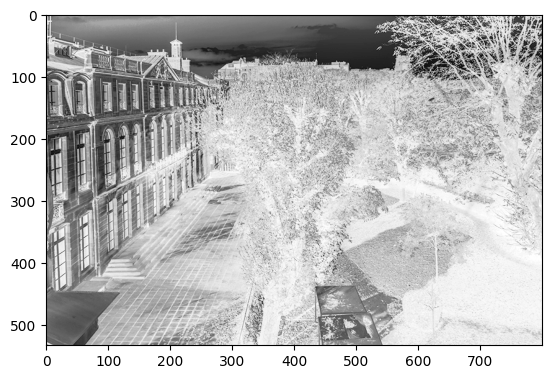

765
uint64


In [83]:
#0
im = plt.imread("les-mines.jpg")
image = np.copy(im)

#1
#un peu de mal à savoir comment sommer juste la dernière dim...
T = image[:, :, 0] + image[:, :, 1] + image[:, :, 2]

#2
plt.imshow(T, cmap='Greys')
plt.show()

print(np.max(T))
print(T.dtype)

#3
T2 = image.sum(axis=2)

#4
plt.imshow(T2, cmap='Greys')
plt.show()

print(np.max(T2))
print(T2.dtype)

#5
#???

uint8


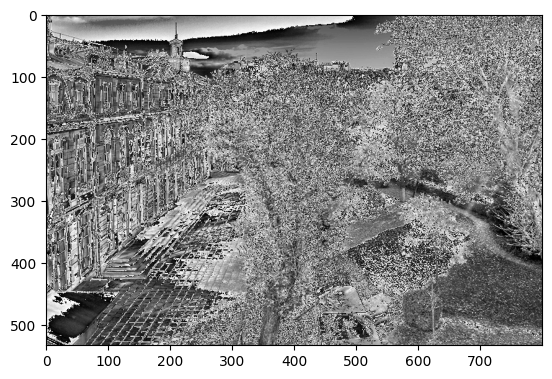

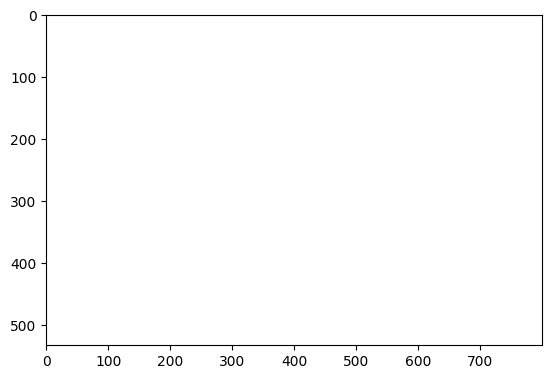

array([0])

In [84]:
im = plt.imread("les-mines.jpg")
image = np.copy(im)

#6
gris = (image[:, :, 0] + image[:, :, 1] + image[:, :, 2])/3
gris = gris.astype('uint8')
print(gris.dtype)
plt.imshow(gris, cmap='gray')
plt.show()

#7
gris2 = np.where(gris>=127, 255, 0)

plt.imshow(gris2, cmap='Greys')
plt.show()

#8
np.unique(gris2)

## Image en sépia

Pour passer en sépia les valeurs R, G et B d'un pixel  
(encodées ici sur un entier non-signé 8 bits)  

1. on transforme les valeurs $R$, $G$ et $B$ par la transformation  
$0.393\, R + 0.769\, G + 0.189\, B$  
$0.349\, R + 0.686\, G + 0.168\, B$  
$0.272\, R + 0.534\, G + 0.131\, B$  
(attention les calculs doivent se faire en flottants pas en uint8  
pour ne pas avoir, par exemple, 256 devenant 0)  
1. puis on seuille les valeurs qui sont plus grandes que `255` à `255`
1. naturellement l'image doit être ensuite remise dans un format correct  
(uint8 ou float entre 0 et 1)

**Exercice**

1. Faites une fonction qui prend en argument une image RGB et rend une image RGB sépia  
la fonction `numpy.dot` doit être utilisée (si besoin, voir l'exemple ci-dessous) 

1. Passez votre patchwork de couleurs en sépia  
Lisez le fichier `patchwork-all.jpg` si vous n'avez pas de fichier perso
2. Passez l'image `les-mines.jpg` en sépia   

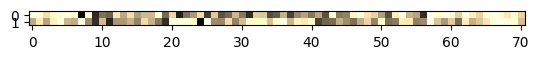

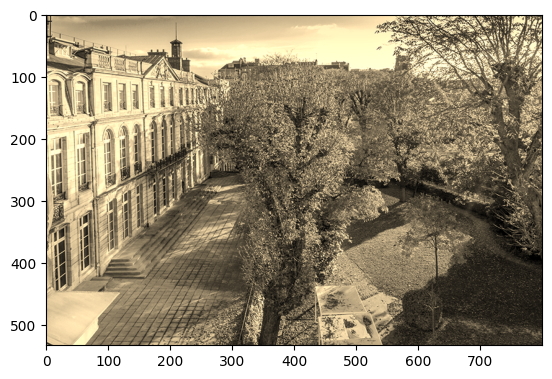

In [75]:
#1
T_transition = np.transpose(np.array([[0.393,0.769,0.189],[0.349,0.686,0.168],[0.272,0.534,0.131]]))
#faut transposer la matrice de transition à cause de dot.

def sepia(imrgb) :
    T_sepia = np.array(imrgb, dtype=float)
    T_sepia = np.dot(T_sepia, T_transition)
    T_sepia = np.array(np.where(T_sepia>255, 255, T_sepia), dtype=np.uint8)
    return T_sepia

#2
image = plt.imread('patchwork.jpg')
plt.imshow(sepia(image))
plt.show()

#3
image2 = plt.imread('les-mines.jpg')
plt.imshow(sepia(image2));

In [72]:
# INDICE:

# exemple de produit de matrices avec `numpy.dot`
# le help(np.dot) dit: dot(A, B)[i,j,k,m] = sum(A[i,j,:] * B[k,:,m])

i, j, k, m, n = 2, 3, 4, 5, 6
A = np.arange(i*j*k).reshape(i, j, k)
B = np.arange(m*k*n).reshape(m, k, n)

C = A.dot(B)
# or C = np.dot(A, B)

A.shape, B.shape, C.shape

((2, 3, 4), (5, 4, 6), (2, 3, 5, 6))

## Exemple de qualité de compression

1. Importez la librairie `Image`de `PIL` (pillow)   
(vous devez peut être installer PIL dans votre environnement)
1. Quelle est la taille du fichier 'les-mines.jpg' sur disque ?
1. Lisez le fichier 'les-mines.jpg' avec `Image.open` et avec `plt.imread`  

3. Vérifiez que les valeurs contenues dans les deux objets sont proches

4. Sauvez (toujours avec de nouveaux noms de fichiers)  
l'image lue par `imread` avec `plt.imsave`  
l'image lue par `Image.open` avec `save` et une `quality=100`  
(`save` s'applique à l'objet créé par `Image.open`)

5. Quelles sont les tailles de ces deux fichiers sur votre disque ?  
Que constatez-vous ?

6. Relisez les deux fichiers créés et affichez avec `plt.imshow` leur différence  

In [81]:
#1
from PIL import Image

#2
image = plt.imread ('les-mines.jpg')
print(image.shape)
print(image.size)

#3
image1=plt.imread('les-mines.jpg')
image2=Image.open('les-mines.jpg')

#4
print (np.all(np.isclose(image1, image2)))

#5
plt.imsave('imsave.jpg', image1)
image2.save ('save.jpg', quality=100)

#6
print(plt.imread('imsave.jpg').size)
print(plt.imread('save.jpg').size)
#égales

(533, 800, 3)
1279200
True
1279200
1279200
